In [ ]:
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
# nltk
import nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# DATASET_COLUMNS=['target','ids','date','flag','user','text']
DATASET_ENCODING = "ISO-8859-1"
df = pd.read_csv('ndata.csv', encoding=DATASET_ENCODING)
df.head()

,text,target
0,"@IAmBhargava If u r paying the bill, Cable Car...",4
1,@Popcorn_Nut awww noo! that's a shame. i had ...,0
2,@Serenade13 read previous tweet to @hakuna_mat...,4
3,@magicswebpage That's how it goes it sucks.....,0
4,yay we changes rooms! classrooms I mean. I mig...,4


In [ ]:
df.shape

(104000, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104000 entries, 0 to 103999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    104000 non-null  object
 1   target  104000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.6+ MB


In [ ]:
df.dtypes

text      object
target     int64
dtype: object

In [ ]:
df.isna().sum()

text      0
target    0
dtype: int64

<Axes: xlabel='target', ylabel='count'>

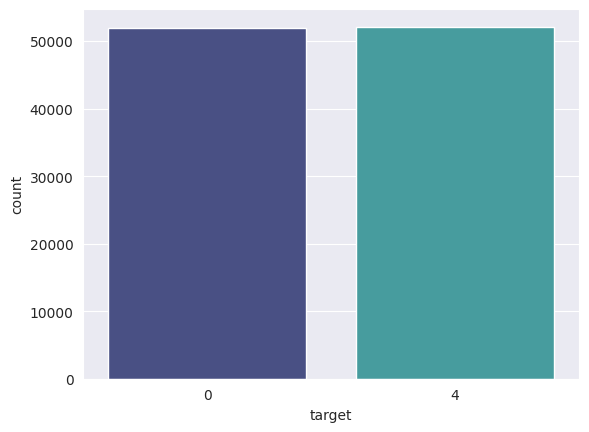

In [ ]:
sns.set_style('darkgrid')
sns.countplot(data=df, x='target', palette='mako')

In [ ]:
data = df[['text', 'target']].copy()

In [ ]:
data['target'] = data['target'].replace(4, 1)

In [ ]:
data['text'] = data['text'].str.lower()
sdata = data.copy()

In [ ]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [ ]:
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
data['text'] = data['text'].apply(lambda text: cleaning_stopwords(text))
data['text'].head()

0    @warpedtourdoc definitely excited...but got wa...
1    going sleep 2 minutes, 00:49 morning, good nig...
2             yayy..no work tomorrow. ivy &amp; jordyn
3                                    love phineas ferb
4          going run... i'm going break rent twilight.
Name: text, dtype: object

In [ ]:
import string
english_punctuations = string.punctuation
pl = english_punctuations

def cleaning_punctuations(text):
  text = text.translate(str.maketrans('', '',string.punctuation))
  return text
data['text']= data['text'].apply(lambda x: cleaning_punctuations(x))
data['text'].tail()

111995    ok gotta pick movie olive dum dums amp snacks ...
111996     hopes no weird dreams tonight get early tomorrow
111997    lokey dont eat sugary cereal never given child xd
111998        says good morning everyone httpplurkcompz685b
111999       k no really going see angles demons reals time
Name: text, dtype: object

In [ ]:
# tl = '@warpedtourdoc @definitely excited...but got wa'
# print(tl)
# tl = cleaning_punctuations(tl)
# print(tl)

In [ ]:
data['text'].head()

0    warpedtourdoc definitely excitedbut got wait t...
1    going sleep 2 minutes 0049 morning good night ...
2                  yayyno work tomorrow ivy amp jordyn
3                                    love phineas ferb
4               going run im going break rent twilight
Name: text, dtype: object

In [ ]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
data['text'] = data['text'].apply(lambda x: cleaning_repeating_char(x))
data['text'].tail()

111995    ok gotta pick movie olive dum dums amp snacks ...
111996     hopes no weird dreams tonight get early tomorrow
111997    lokey dont eat sugary cereal never given child xd
111998        says good morning everyone httpplurkcompz685b
111999       k no really going see angles demons reals time
Name: text, dtype: object

In [ ]:
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
data['text'] = data['text'].apply(lambda x: cleaning_URLs(x))
data['text'].tail()

111995    ok gotta pick movie olive dum dums amp snacks ...
111996     hopes no weird dreams tonight get early tomorrow
111997    lokey dont eat sugary cereal never given child xd
111998        says good morning everyone httpplurkcompz685b
111999       k no really going see angles demons reals time
Name: text, dtype: object

In [ ]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
data['text'] = data['text'].apply(lambda x: cleaning_numbers(x))
data['text'].tail()

111995    ok gotta pick movie olive dum dums amp snacks ...
111996     hopes no weird dreams tonight get early tomorrow
111997    lokey dont eat sugary cereal never given child xd
111998           says good morning everyone httpplurkcompzb
111999       k no really going see angles demons reals time
Name: text, dtype: object

In [ ]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'w+')
data['text'] = data['text'].apply(tokenizer.tokenize)
data['text'].head()

0    [w, w, w]
1          [w]
2    [w, w, w]
3           []
4       [w, w]
Name: text, dtype: object

In [ ]:
data.head()

,text,target
0,"[w, w, w]",0
1,[w],1
2,"[w, w, w]",1
3,[],1
4,"[w, w]",1


In [ ]:
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
data['text']= data['text'].apply(lambda x: stemming_on_text(x))
data['text'].head()

0    [w, w, w]
1          [w]
2    [w, w, w]
3           []
4       [w, w]
Name: text, dtype: object

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
data['text'] = data['text'].apply(lambda x: lemmatizer_on_text(x))
data['text'].head()

0    [w, w, w]
1          [w]
2    [w, w, w]
3           []
4       [w, w]
Name: text, dtype: object

In [ ]:
X=sdata.text
y=sdata.target

In [ ]:
X.head()

0    @warpedtourdoc definitely excited...but i got ...
1    going to sleep in 2 minutes, 00:49 in the morn...
2       yayy..no work tomorrow. with ivy &amp; jordyn 
3                             i love phineas and ferb 
4    going for a run... then i'm going to break dow...
Name: text, dtype: object

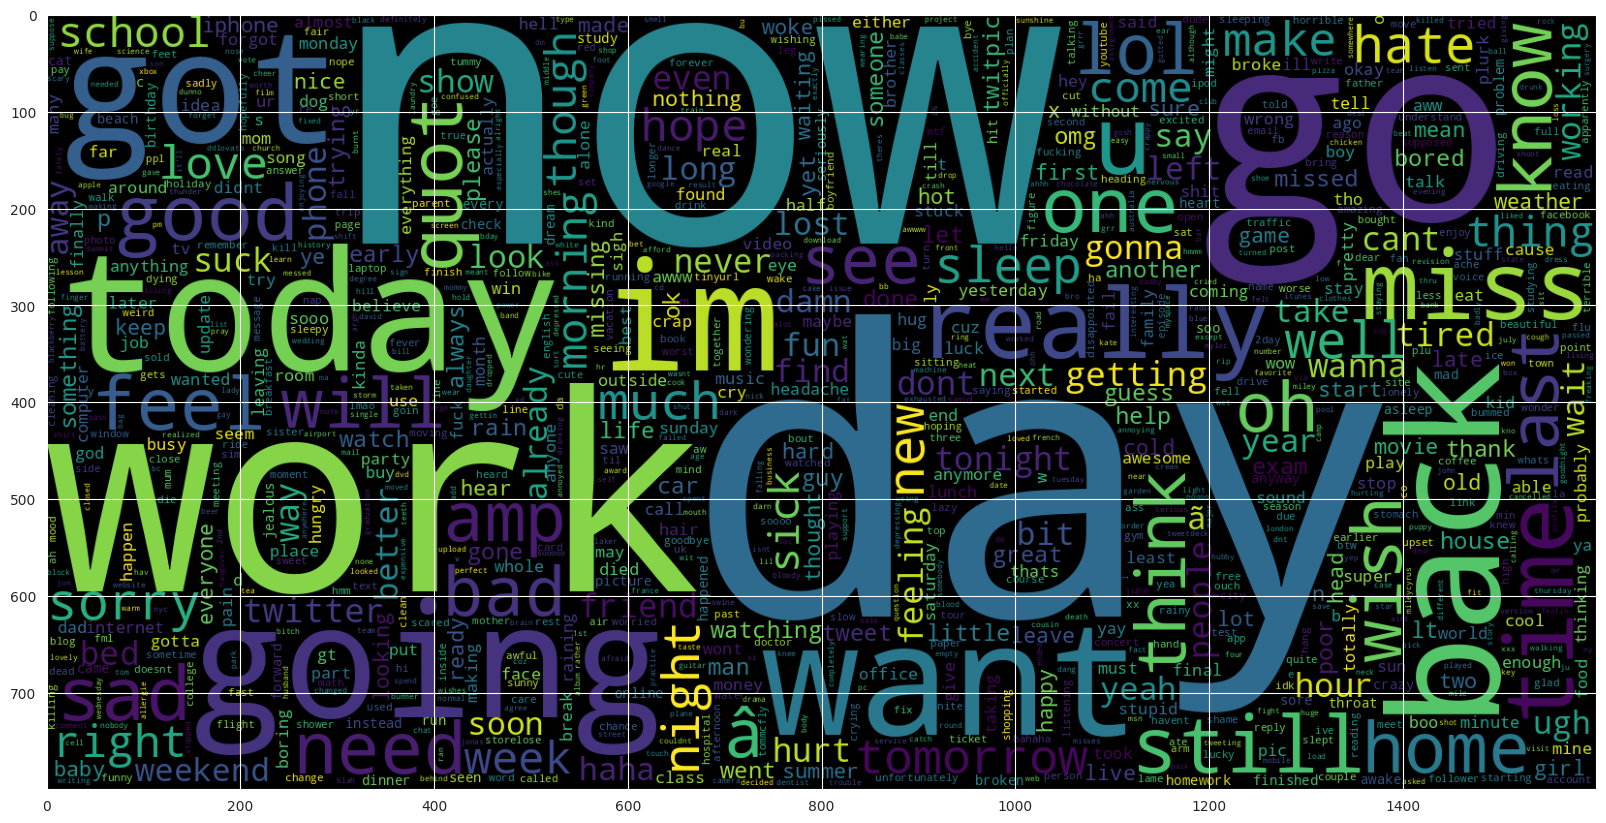

In [ ]:
data_neg = sdata[sdata['target'] == 0]['text']
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

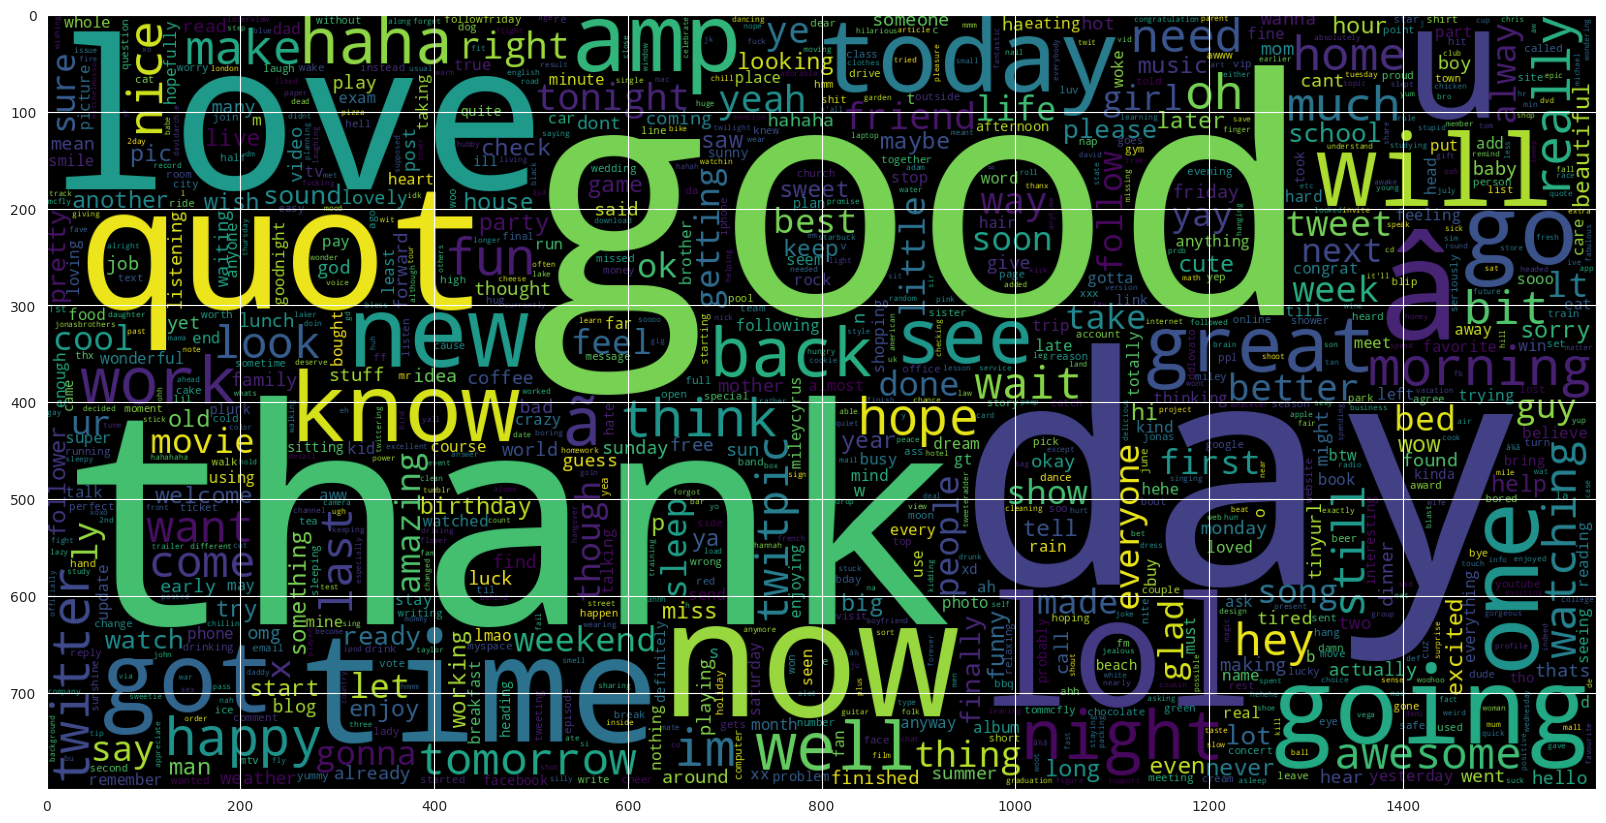

In [ ]:
data_pos = sdata[sdata['target'] == 1]['text']
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_pos))
plt.imshow(wc)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.05, random_state =26105111)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(106400,) (5600,) (106400,) (5600,)


In [ ]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)

TfidfVectorizer(max_features=500000, ngram_range=(1, 2))

In [ ]:
print('No. of feature_words: ', len(vectoriser.get_feature_names_out()))

No. of feature_words:  500000


In [ ]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

###Function for model evaluation:
1. Accuracy Score
2. Confusion Matrix plot
3. ROC-AUC Curve

In [ ]:
def model_evaluate(model):
  # Predict values for Test dataset
  y_pred = model.predict(X_test)
  # Print the evaluation metrics for the dataset.
  print(classification_report(y_test, y_pred))
  # Compute and plot the Confusion matrix
  cf_matrix = confusion_matrix(y_test, y_pred)
  categories = ['Negative','Positive']
  group_names = ['True Neg','False Pos', 'False Neg','True Pos']
  group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
  labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
  xticklabels = categories, yticklabels = categories)
  plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
  plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
  plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

###Model Building

              precision    recall  f1-score   support

           0       0.77      0.78      0.78      2807
           1       0.78      0.77      0.77      2793

    accuracy                           0.78      5600
   macro avg       0.78      0.78      0.78      5600
weighted avg       0.78      0.78      0.78      5600



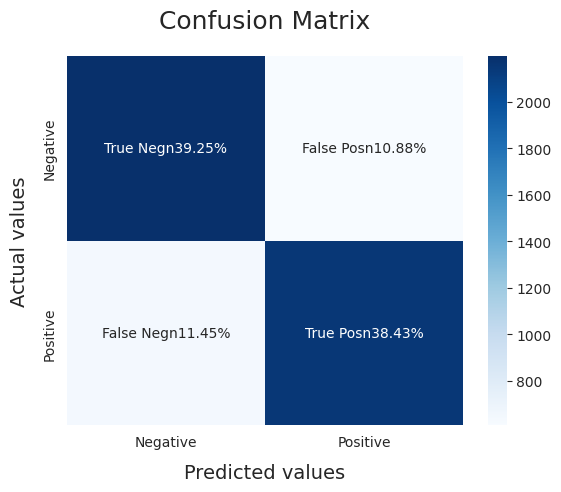

In [ ]:
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)

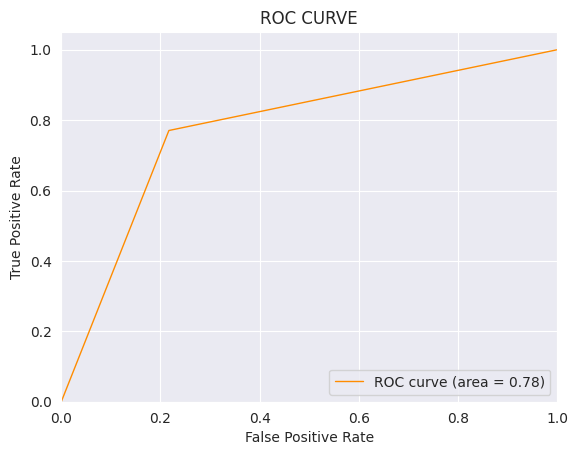

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred1)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

              precision    recall  f1-score   support

           0       0.78      0.80      0.79      2807
           1       0.79      0.78      0.78      2793

    accuracy                           0.79      5600
   macro avg       0.79      0.79      0.79      5600
weighted avg       0.79      0.79      0.79      5600



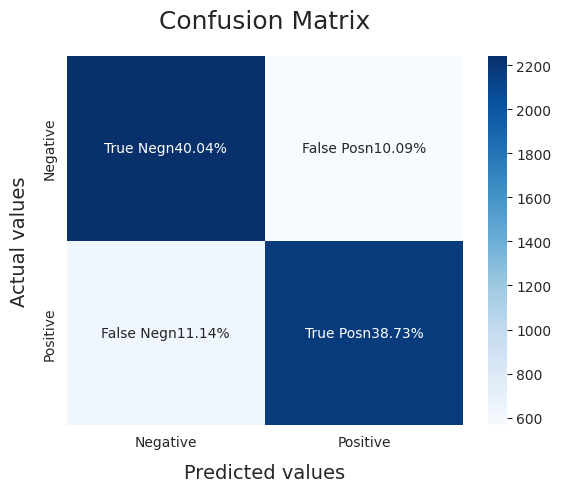

In [ ]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)

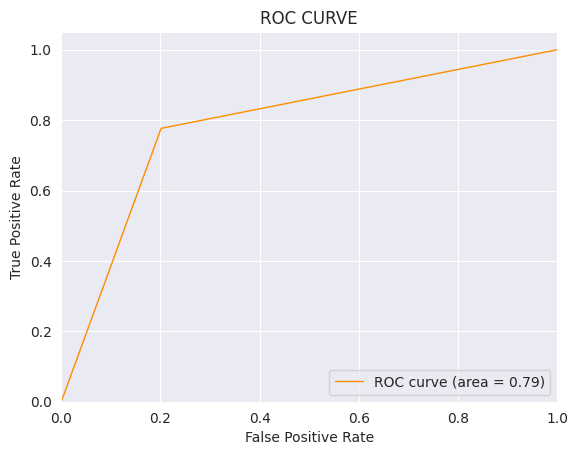

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred2)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

              precision    recall  f1-score   support

           0       0.78      0.80      0.79      2807
           1       0.79      0.78      0.79      2793

    accuracy                           0.79      5600
   macro avg       0.79      0.79      0.79      5600
weighted avg       0.79      0.79      0.79      5600



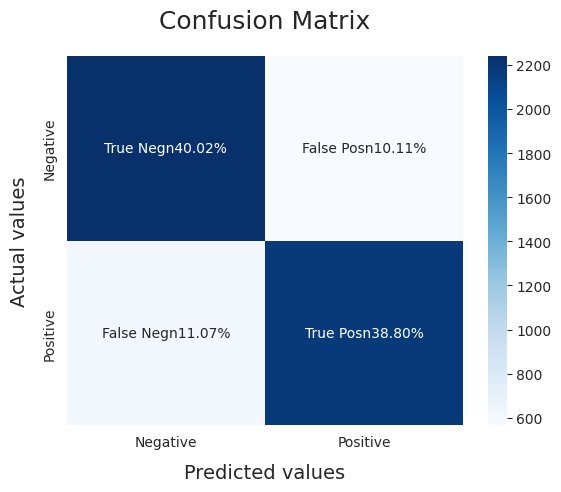

In [ ]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)

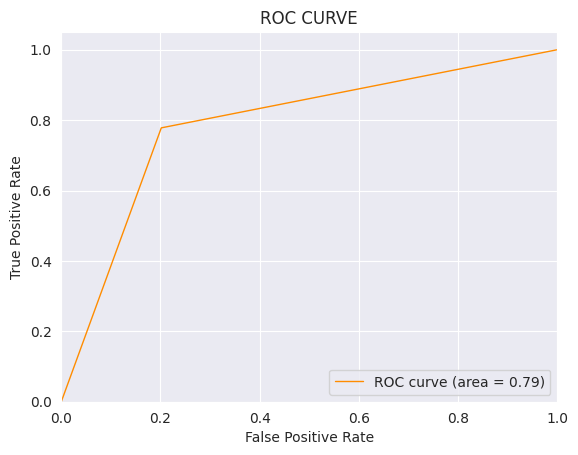

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred3)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

In [ ]:
df2 = df[['text', 'target']].copy()

In [ ]:
df2.head()

,text,target
0,"@IAmBhargava If u r paying the bill, Cable Car...",4
1,@Popcorn_Nut awww noo! that's a shame. i had ...,0
2,@Serenade13 read previous tweet to @hakuna_mat...,4
3,@magicswebpage That's how it goes it sucks.....,0
4,yay we changes rooms! classrooms I mean. I mig...,4


In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

def preprocess_data(data):
    # Lowercase the text
    data['text'] = data['text'].str.lower()

    # Remove special characters and numbers
    data['text'] = data['text'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))

    # Tokenize the text
    data['text'] = data['text'].apply(word_tokenize)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    data['text'] = data['text'].apply(lambda x: [word for word in x if word not in stop_words])

    # Lemmatize the words
    lemmatizer = WordNetLemmatizer()
    data['text'] = data['text'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

    # Convert the tokenized text back to string
    data['text'] = data['text'].apply(lambda x: ' '.join(x))

    return data

In [ ]:
df2 = preprocess_data(df2)

In [ ]:
df2['text'].head()

0           iambhargava u r paying bill cable car rock
1    popcornnut awww noo thats shame uninstall sims...
2            serenade read previous tweet hakunamatata
3    magicswebpage thats go suckshate broke paying ...
4    yay change room classroom mean might able see ...
Name: text, dtype: object

In [ ]:
vectorizer = TfidfVectorizer()
features = vectorizer.fit_transform(df2['text'])

# Get the feature names (words) as a list
feature_names = vectorizer.get_feature_names_out()

In [ ]:
len(feature_names)

103975

In [ ]:
df2.head()

,text,target
0,iambhargava u r paying bill cable car rock,4
1,popcornnut awww noo thats shame uninstall sims...,0
2,serenade read previous tweet hakunamatata,4
3,magicswebpage thats go suckshate broke paying ...,0
4,yay change room classroom mean might able see ...,4


In [ ]:
df2['target'] = df2['target'].replace(4, 1)
df2.head()

,text,target
0,iambhargava u r paying bill cable car rock,1
1,popcornnut awww noo thats shame uninstall sims...,0
2,serenade read previous tweet hakunamatata,1
3,magicswebpage thats go suckshate broke paying ...,0
4,yay change room classroom mean might able see ...,1


In [ ]:
import tensorflow as tf
print("GPU Available:", tf.test.is_gpu_available())


Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


GPU Available: True


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Assuming you have preprocessed data in a DataFrame called 'preprocessed_data' with 'text' and 'sentiment' columns

# Step 4: Split the dataset
X = df2['text']
y = df2['target']

# # Encode the sentiment labels
# label_encoder = LabelEncoder()
y_encoded = y
# label_encoder.fit_transform(y)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Step 3: Feature extraction (using word-level embeddings)
max_length = 100  # Maximum sequence length
embedding_dim = 100  # Dimension of word embeddings
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

X_train_padded = pad_sequences(X_train_sequences, maxlen=max_length, padding='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_length, padding='post')

vocab_size = len(tokenizer.word_index) + 1

In [ ]:
import tensorflow as tf

# Specify GPU device placement
device = tf.device('/GPU:0')

with device:
  model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.LSTM(128, dropout=0.2, recurrent_dropout=0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  # Step 6: Train the model
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
  model.fit(X_train_padded, y_train, validation_data=(X_test_padded, y_test), epochs=10, batch_size=32)

  # Step 7: Evaluate the model
  _, accuracy = model.evaluate(X_test_padded, y_test)
  print("Accuracy:", accuracy)


Epoch 1/10
2600/2600 [==============================] - 580s 220ms/step - loss: 0.6933 - accuracy: 0.5007 - val_loss: 0.6931 - val_accuracy: 0.5052
Epoch 2/10
2600/2600 [==============================] - 548s 211ms/step - loss: 0.6933 - accuracy: 0.5005 - val_loss: 0.6931 - val_accuracy: 0.5052
Epoch 3/10
2600/2600 [==============================] - 528s 203ms/step - loss: 0.6932 - accuracy: 0.5001 - val_loss: 0.6931 - val_accuracy: 0.5052
Epoch 4/10
2600/2600 [==============================] - 517s 199ms/step - loss: 0.6932 - accuracy: 0.4969 - val_loss: 0.6931 - val_accuracy: 0.5052
Epoch 5/10
2600/2600 [==============================] - 513s 197ms/step - loss: 0.6932 - accuracy: 0.5001 - val_loss: 0.6931 - val_accuracy: 0.5052
Epoch 6/10
2600/2600 [==============================] - 516s 198ms/step - loss: 0.6932 - accuracy: 0.4989 - val_loss: 0.6931 - val_accuracy: 0.5052
Epoch 7/10
2600/2600 [==============================] - 511s 197ms/step - loss: 0.6932 - accuracy: 0.4988 - val_